In [1]:
from utils import *

stock_list = pd.read_csv('./themed_stocks_with_code_no_dup.csv', index_col=0)['Name'].to_numpy()
stock_list

array(['제주반도체', '대한약품', '유한양행', ..., '신세계', '현대백화점', '사조씨푸드'],
      dtype=object)

In [2]:
# stock Code, Name 추출
krx_list = pd.DataFrame(get_KRX_list())
stock_list = pd.DataFrame(krx_list[krx_list['Name'].isin(stock_list)])
stock_list

,Code,Name
0,005930,삼성전자
1,373220,LG에너지솔루션
2,000660,SK하이닉스
3,207940,삼성바이오로직스
5,005490,POSCO홀딩스
...,...,...
1696,442130,유진스팩9호
1697,465320,교보15호스팩
1698,438580,엔에이치스팩25호
1700,457940,에스케이증권제10호스팩


[2, 6]


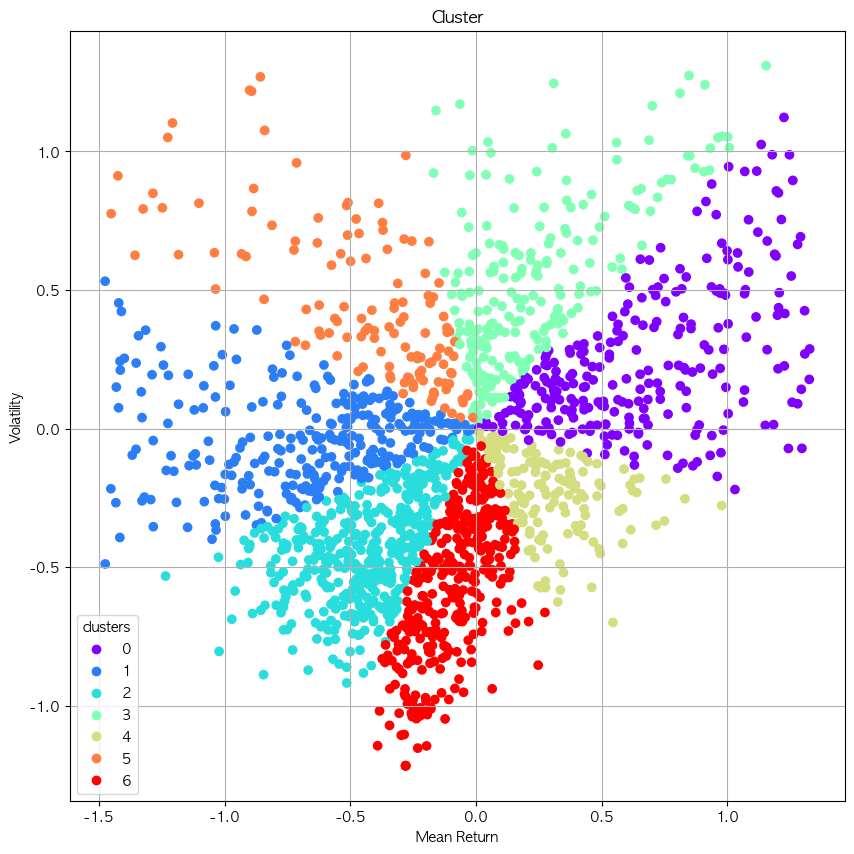

In [12]:
# 데이터 기간 설정
start_date, end_date = '20230101', '20231206'

# 실행
# df = get_cluster_labels_dataset(stock_list, start_date, end_date)
# df = get_close_data(stock_list['Code'], stock_list['Name'], start_date, end_date)

file = 'themed_stocks_for_cluster.csv'
# 저장
# df.to_csv(file)
# 불러오기
df = pd.read_csv(file, index_col=0)

df = get_pct(df)
df = standard_scaler(df)
df = remove_outliers(df)
# 이상치 제거


# euclidean Cluster
# labels = affinity_clustering(df)

# cosine clustering
labels, hight_return_volatility = get_labels_optimal_cluster(df)
df = add_cluster_labels(df, labels)
print(hight_return_volatility)
# 시각화
visualize_clusters(df)

In [12]:
df = add_cluster_labels(df, labels)
df.to_csv('themed_stocks_with_cluster.csv')

In [13]:
# stock Code, Name 추출
# krx_list = pd.DataFrame(get_KRX_list())
themed_list = pd.DataFrame(krx_list[krx_list['Name'].isin(df.index)])
# themed_list
# df = pd.DataFrame(labels)

df = add_cluster_info(df, themed_list)
# df

In [17]:
# df = df.drop(['Returns', 'Volatility'],axis=1)
df.to_csv('themed_stocks_with_cluster.csv', index=False)